In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


from TinyNN.NN.MLP import  MLP
from TinyNN.NN.Layer import  Layer
from TinyNN.NN.Value import  Value
from TinyNN.Activations.activation import Linear, Relu, Tanh, Sigmoid, Exp
from TinyNN.Training.loss import loss, max_margin_loss
from TinyNN.Training.train import train

from sklearn.datasets import make_moons, make_blobs

np.random.seed(48)
random.seed(48)

## Classification 

In this section, we run throuh a simple example where we train the NN on a basic classification problem

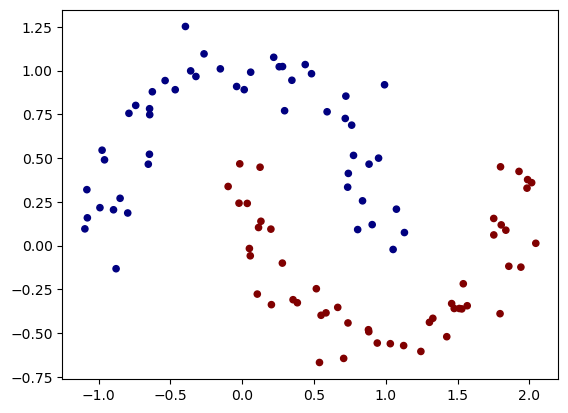

In [13]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [16]:
model = MLP() # 2-layer neural network
model.add(Layer(2, 16, activation = Tanh()))
model.add(Layer(16, 16, activation = Tanh()))
model.add(Layer(16, 1, activation = Linear()))

In [17]:
train(model, max_margin_loss, X, y, lr = 1)

Epoch 0, loss 0.4053
Epoch 1, loss 0.8298
Epoch 2, loss 1.0683
Epoch 3, loss 0.6259
Epoch 4, loss 0.3318
Epoch 5, loss 0.3173
Epoch 6, loss 0.3372
Epoch 7, loss 0.2551
Epoch 8, loss 0.3338
Epoch 9, loss 0.2285
Epoch 10, loss 0.2715
Epoch 11, loss 0.1779
Epoch 12, loss 0.2509
Epoch 13, loss 0.1513
Epoch 14, loss 0.2523
Epoch 15, loss 0.1157
Epoch 16, loss 0.1424
Epoch 17, loss 0.127
Epoch 18, loss 0.2776
Epoch 19, loss 0.083
Epoch 20, loss 0.0714
Epoch 21, loss 0.1465
Epoch 22, loss 0.0317
Epoch 23, loss 0.0233
Epoch 24, loss 0.0219
Epoch 25, loss 0.0198
Epoch 26, loss 0.0288
Epoch 27, loss 0.0228
Epoch 28, loss 0.0585
Epoch 29, loss 0.3147
Epoch 30, loss 0.0834
Epoch 31, loss 0.0138
Epoch 32, loss 0.0083
Epoch 33, loss 0.0089
Epoch 34, loss 0.0074
Epoch 35, loss 0.0085
Epoch 36, loss 0.0023
Epoch 37, loss 0.0021
Epoch 38, loss 0.0072
Epoch 39, loss 0.0011
Epoch 40, loss 0.0014
Epoch 41, loss 0.0019
Epoch 42, loss 0.0014
Epoch 43, loss 0.0057
Epoch 44, loss 0.001
Epoch 45, loss 0.0015
E

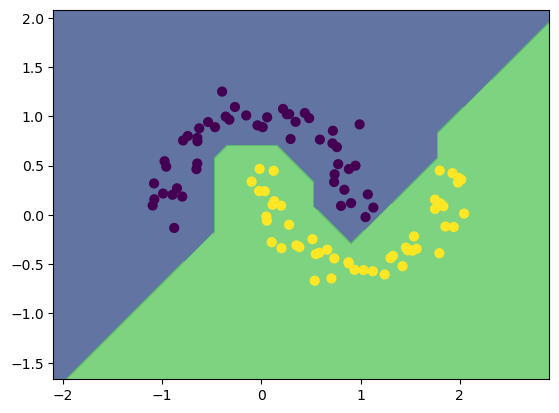

In [18]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].ma() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

The NN seems to be doing a good job of classifying the points! 

## Regression

We will now use the NN to train for a regression problem. We will fit a cubic with Gaussian Noise

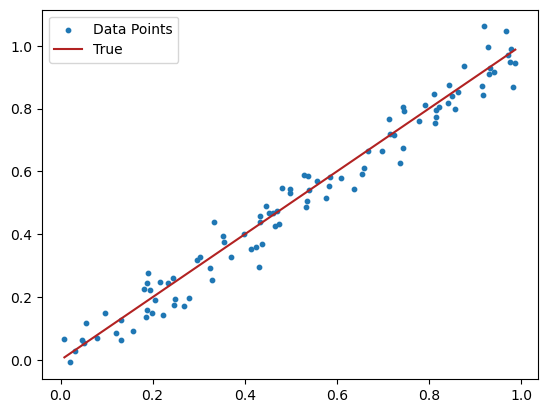

In [6]:
X = np.random.random_sample(size=100) 
X = np.sort(X)

y_true = X
y = y_true +np.random.normal(loc=0.0, scale=0.05, size=100)

plt.scatter(X, y, s = 10, label = 'Data Points')
plt.plot(X, y_true, color = 'firebrick', label = 'True')
plt.legend()
plt.show()

In [7]:
def mean_square_error(y, yhat):
    return (1/len(y))*sum(((yi-yhi)**2 for yi, yhi in zip(y, yhat)))

In [8]:
def train(model, loss_func, X, y, epochs = 50, n_batches = 1, alpha = 1e-4, lr = 0.1):
    batch_size = len(X) // n_batches
    for k in range(epochs):
        for b in range(n_batches):
            total_loss = loss(model, loss_func,X[b*batch_size:(b+1)*batch_size],y[b*batch_size:(b+1)*batch_size], alpha = alpha)
        
            model.zero_grad()
            total_loss.backward()
            
            learning_rate = (lr/n_batches)*(1.0 - 0.9*k/100)
            for p in model.parameters():
                # print(p)
                p.data -= learning_rate * p.grad
                
        if k % 1 == 0:
            print(f"Epoch {k}, loss {np.round(total_loss.data,4)}")

In [9]:
model = MLP() 
model.add(Layer(1, 2, activation = Linear()))
model.add(Layer(2, 1, activation = Linear()))

train(model, mean_square_error, [[Xi] for Xi in X], y, epochs = 100, n_batches = 5, lr = 0.5, alpha = 0.005)
# model([1])


Epoch 0, loss 0.0623
Epoch 1, loss 0.0283
Epoch 2, loss 0.0219
Epoch 3, loss 0.0175
Epoch 4, loss 0.0141
Epoch 5, loss 0.0115
Epoch 6, loss 0.0095
Epoch 7, loss 0.008
Epoch 8, loss 0.0069
Epoch 9, loss 0.0061
Epoch 10, loss 0.0054
Epoch 11, loss 0.005
Epoch 12, loss 0.0046
Epoch 13, loss 0.0043
Epoch 14, loss 0.0041
Epoch 15, loss 0.0039
Epoch 16, loss 0.0038
Epoch 17, loss 0.0037
Epoch 18, loss 0.0037
Epoch 19, loss 0.0036
Epoch 20, loss 0.0036
Epoch 21, loss 0.0035
Epoch 22, loss 0.0035
Epoch 23, loss 0.0035
Epoch 24, loss 0.0034
Epoch 25, loss 0.0034
Epoch 26, loss 0.0034
Epoch 27, loss 0.0034
Epoch 28, loss 0.0034
Epoch 29, loss 0.0034
Epoch 30, loss 0.0034
Epoch 31, loss 0.0034
Epoch 32, loss 0.0034
Epoch 33, loss 0.0034
Epoch 34, loss 0.0034
Epoch 35, loss 0.0034
Epoch 36, loss 0.0034
Epoch 37, loss 0.0034
Epoch 38, loss 0.0034
Epoch 39, loss 0.0034
Epoch 40, loss 0.0034
Epoch 41, loss 0.0034
Epoch 42, loss 0.0033
Epoch 43, loss 0.0033
Epoch 44, loss 0.0033
Epoch 45, loss 0.0033


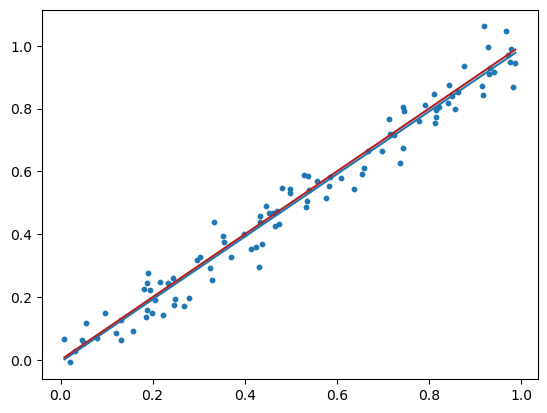

In [10]:
plt.plot(X, [v.data for v in model.forwards([[Xi] for Xi in X])], label = 'True')
plt.plot(X, y_true, color = 'firebrick', label = 'True')
plt.scatter(X, y, s = 10, label = "Data Points")
plt.show()


So we have got it to train on a straight line, however getting it to fit a polynomial is proving quite hard. 